# Data Setup

In this notebook, we demonstrate how to:
- setup time series data for this RNN tutorial
- visualize the data

The data in this example is taken from the GEFCom2014 forecasting competition<sup>1</sup>. It consists of 3 years of hourly electricity load and temperature values between 2012 and 2014. 

<sup>1</sup>Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli and Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
%matplotlib inline

from common.utils import load_data, mape

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [2]:
if not os.path.exists(os.path.join('data', 'energy.csv')):
    # Download and move the zip file
    !wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
    !mv GEFCom2014.zip ./data
    # If not done already, extract zipped data and save as csv
    %run common/extract_data.py

--2018-09-10 05:05:26--  https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
Resolving webproxy (webproxy)... 10.36.12.1
Connecting to webproxy (webproxy)|10.36.12.1|:3128... connected.
Proxy request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip [following]
--2018-09-10 05:05:26--  https://www.dropbox.com/s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip
Reusing existing connection to www.dropbox.com:443.
Proxy request sent, awaiting response... 302 Found
Location: https://ucc8dff336e295482f4e1d069ca1.dl.dropboxusercontent.com/cd/0/inline/AQLp1EjIJ-CMuS5_ro4zIIuzgapqbtTAsBJiSw3T8InbcVC2COBLp4kusPyATl2fVa2mHmlXxRj65Q-wF5Z3wNf4pkxeHBMIr90ODWDvTBXneTxU4xTfPFx9qUrM0pBeJCUO12inymlPwueBJsAuLDeTfAfq6Ct2ZCe_JUoGhZRX77D0QJO41mRi0WhDZGNNpis/file [following]
--2018-09-10 05:05:26--  https://ucc8dff336e295482f4e1d069ca1.dl.dropboxusercontent.com/cd/0/inline/AQLp1EjIJ-CMuS5_ro4zIIuzgapqbtTAsBJiSw3T8InbcVC2COBLp4kusPyATl2fVa2mHmlXxRj65Q-wF5Z3wNf4pkxeHBMIr90

Load the data from csv into a Pandas dataframe

In [3]:
energy = load_data()[['load']]
energy.head()

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"


Plot all available load data (January 2012 to Dec 2014)

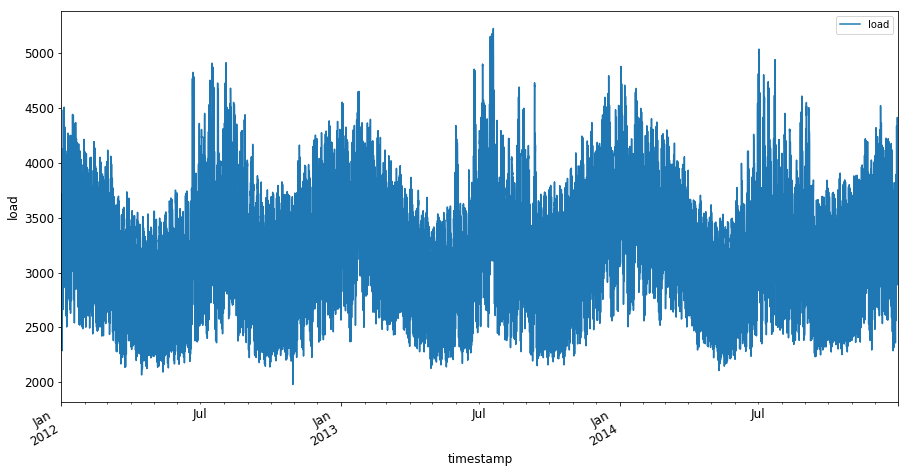

In [4]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

Plot first week of July 2014

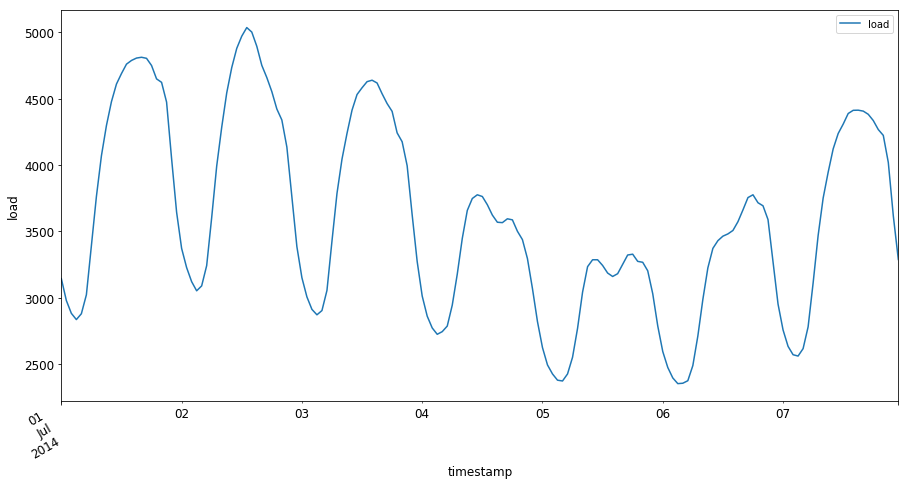

In [5]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

If you are able to run this notebook successfully and see all the visualizations, you are ready to move to next step of this tutorial. 